In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [74]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/advertising.csv")

In [75]:
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,NaN,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2/11/2016 21:49,1
996,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,4/22/2016 2:07,1
997,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2/1/2016 17:24,1
998,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,3/24/2016 2:35,0


In [76]:
data.isna().sum()

Daily Time Spent on Site     0
Age                         84
Area Income                  0
Daily Internet Usage         0
Ad Topic Line                0
City                         0
Male                         0
Country                      0
Timestamp                    0
Clicked on Ad                0
dtype: int64

In [77]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,916.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.128821,55000.000080,180.000100,0.481000,0.50000
std,15.853615,9.018548,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [78]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [79]:
data.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   float64
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.3+ KB


In [81]:
obj_cols = data.select_dtypes(include='object')
num_cols = data.select_dtypes(exclude='object')

In [82]:
obj_cols.columns

Index(['Ad Topic Line', 'City', 'Country', 'Timestamp'], dtype='object')

In [83]:
for col in obj_cols:
    print("="* 30, col, "="* 30)
    print(data[col].nunique())
    print(data[col].value_counts())
    print(data[[col,'Clicked on Ad']].groupby(col).mean().sort_values(by='Clicked on Ad', ascending = False))
    print("="* 70)

============================== Ad Topic Line ==============================
1000
Ad Topic Line
Virtual 5thgeneration emulation                  1
Cloned 5thgeneration orchestration               1
Monitored national standardization               1
Organic bottom-line service-desk                 1
Triple-buffered reciprocal time-frame            1
                                                ..
Centralized content-based focus group            1
Team-oriented grid-enabled Local Area Network    1
Centralized neutral neural-net                   1
Mandatory homogeneous architecture               1
Configurable coherent function                   1
Name: count, Length: 1000, dtype: int64
                                         Clicked on Ad
Ad Topic Line                                         
Visionary mission-critical application             1.0
Visionary maximized process improvement            1.0
Adaptive asynchronous attitude                     1.0
Adaptive context-sensitive ap

============================== Daily Time Spent on Site ==============================
count    1000.000000
mean       65.000200
std        15.853615
min        32.600000
25%        51.360000
50%        68.215000
75%        78.547500
max        91.430000
Name: Daily Time Spent on Site, dtype: float64


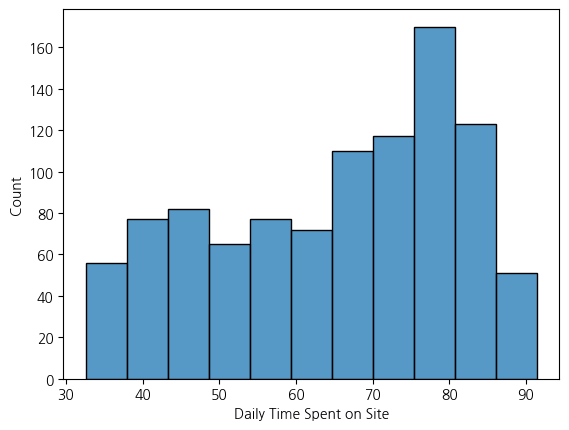

                          Clicked on Ad
Daily Time Spent on Site               
91.37                               1.0
32.60                               1.0
32.84                               1.0
88.97                               1.0
87.27                               1.0
...                                 ...
86.58                               0.0
77.35                               0.0
86.41                               0.0
77.31                               0.0
77.29                               0.0

[900 rows x 1 columns]
============================== Age ==============================
count    1000.000000
mean       36.034000
std         8.636749
min        19.000000
25%        29.750000
50%        35.000000
75%        41.000000
max        61.000000
Name: Age, dtype: float64


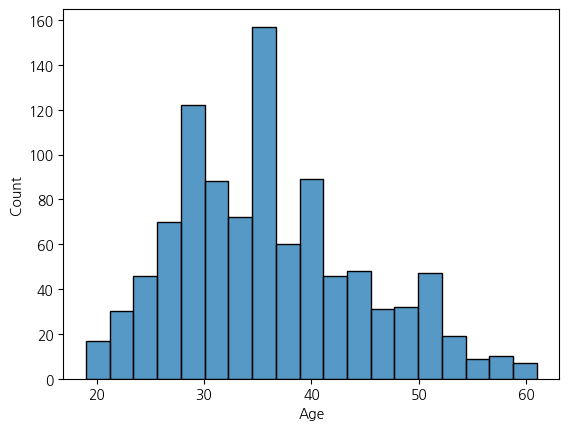

      Clicked on Ad
Age                
56.0       1.000000
55.0       1.000000
52.0       1.000000
61.0       1.000000
60.0       1.000000
59.0       1.000000
58.0       1.000000
57.0       1.000000
54.0       1.000000
50.0       0.950000
49.0       0.941176
48.0       0.933333
47.0       0.923077
43.0       0.904762
53.0       0.900000
45.0       0.896552
51.0       0.833333
44.0       0.789474
42.0       0.760000
38.0       0.678571
41.0       0.655172
46.0       0.611111
39.0       0.538462
40.0       0.529412
37.0       0.468750
36.0       0.450000
35.0       0.435897
30.0       0.428571
23.0       0.421053
29.0       0.380952
33.0       0.378378
34.0       0.371429
24.0       0.263158
32.0       0.257143
31.0       0.245283
28.0       0.244444
26.0       0.216216
27.0       0.212121
19.0       0.166667
20.0       0.166667
25.0       0.148148
22.0       0.090909
21.0       0.000000
============================== Area Income ==============================
count     1000.000000
mean

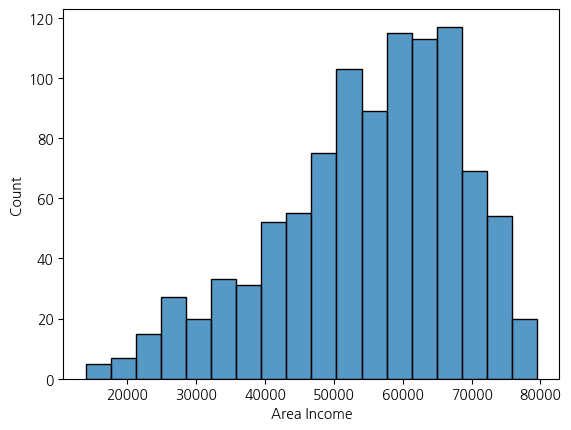

             Clicked on Ad
Area Income               
78520.99               1.0
13996.50               1.0
14548.06               1.0
14775.50               1.0
15598.29               1.0
...                    ...
77988.71               0.0
77871.75               0.0
77567.85               0.0
77460.07               0.0
77220.42               0.0

[1000 rows x 1 columns]
============================== Daily Internet Usage ==============================
count    1000.000000
mean      180.000100
std        43.902339
min       104.780000
25%       138.830000
50%       183.130000
75%       218.792500
max       269.960000
Name: Daily Internet Usage, dtype: float64


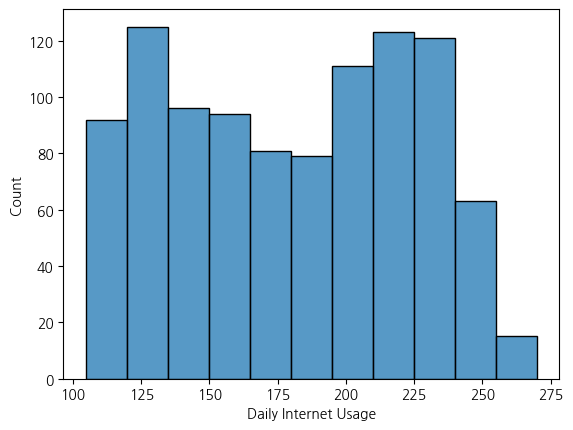

                      Clicked on Ad
Daily Internet Usage               
269.96                          1.0
104.78                          1.0
105.00                          1.0
105.04                          1.0
105.15                          1.0
...                             ...
247.31                          0.0
215.04                          0.0
247.01                          0.0
214.74                          0.0
214.53                          0.0

[966 rows x 1 columns]
============================== Male ==============================
count    1000.000000
mean        0.481000
std         0.499889
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Male, dtype: float64


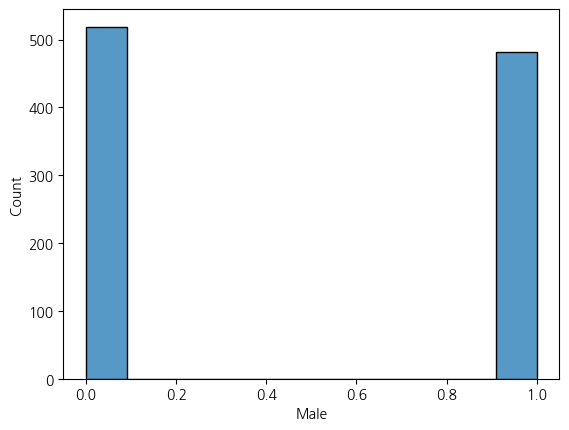

      Clicked on Ad
Male               
0          0.518304
1          0.480249
============================== Clicked on Ad ==============================
count    1000.00000
mean        0.50000
std         0.50025
min         0.00000
25%         0.00000
50%         0.50000
75%         1.00000
max         1.00000
Name: Clicked on Ad, dtype: float64


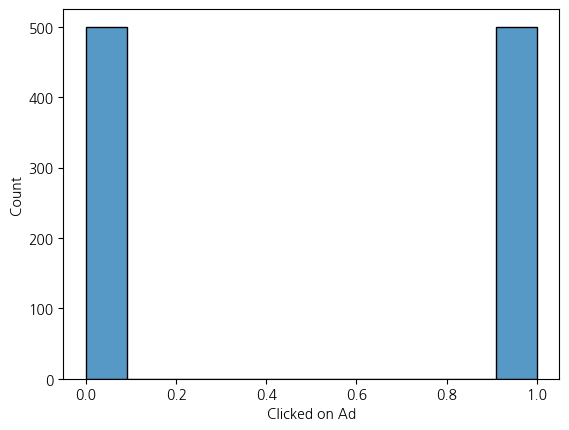

ValueError: Grouper for 'Clicked on Ad' not 1-dimensional

In [46]:
for col in num_cols:
    print("="* 30, col, "="* 30)
    print(data[col].describe())
    sns.histplot(num_cols[col])
    plt.show()
    print(data[[col,'Clicked on Ad']].groupby(col).mean().sort_values(by='Clicked on Ad', ascending = False))
    print("="* 70)

<Axes: >

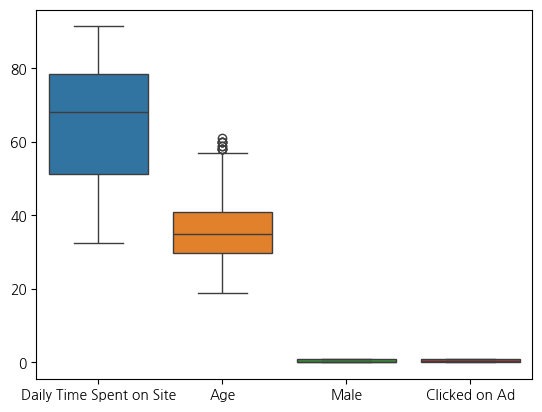

In [84]:
sns.boxplot(data.drop(['Area Income', 'Daily Internet Usage'], axis=1))

<Axes: xlabel='Daily Time Spent on Site', ylabel='Count'>

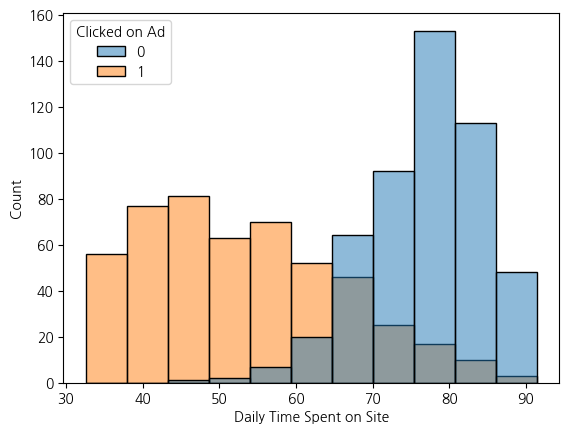

In [85]:
sns.histplot(x='Daily Time Spent on Site', hue='Clicked on Ad', data=data)

<Axes: xlabel='Daily Internet Usage', ylabel='Count'>

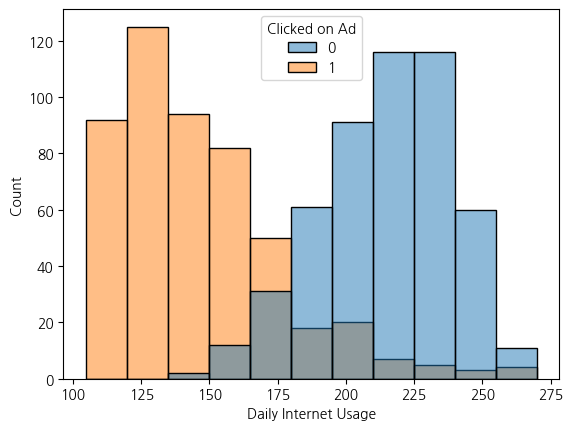

In [86]:
sns.histplot(x='Daily Internet Usage', hue='Clicked on Ad', data=data)

<Axes: xlabel='Age', ylabel='Count'>

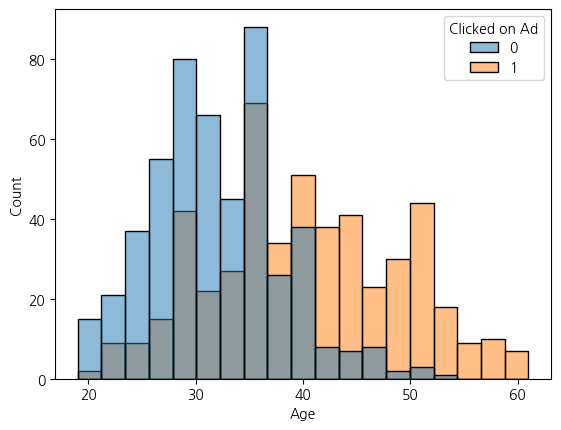

In [87]:
sns.histplot(x='Age', hue='Clicked on Ad', data=data)

<Axes: xlabel='Area Income', ylabel='Count'>

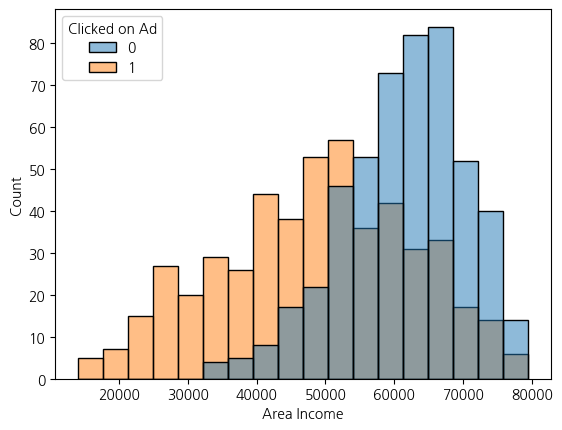

In [88]:
sns.histplot(x='Area Income', hue='Clicked on Ad', data=data)

In [47]:
from ydata_profiling import ProfileReport

/Users/jihyun/miniforge3/envs/fintech/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [48]:
profile = ProfileReport(data, title= "ProfileReport")
profile.to_file("나이브베이즈")

Summarize dataset:  33%|▎| 5/15 [00:00<00:00, 49.58it/s, Describe variable: Coun
Summarize dataset:  67%|▋| 10/15 [00:00<00:00, 19.05it/s, Describe variable: Cli
Render HTML: 100%|████████████████████████████████| 1/1 [00:01<00:00,  1.05s/it]
/Users/jihyun/miniforge3/envs/fintech/lib/python3.12/site-packages/ydata_profiling/profile_report.py:386: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(
Export report to file: 100%|██████████████████████| 1/1 [00:00<00:00, 86.86it/s]


<Axes: >

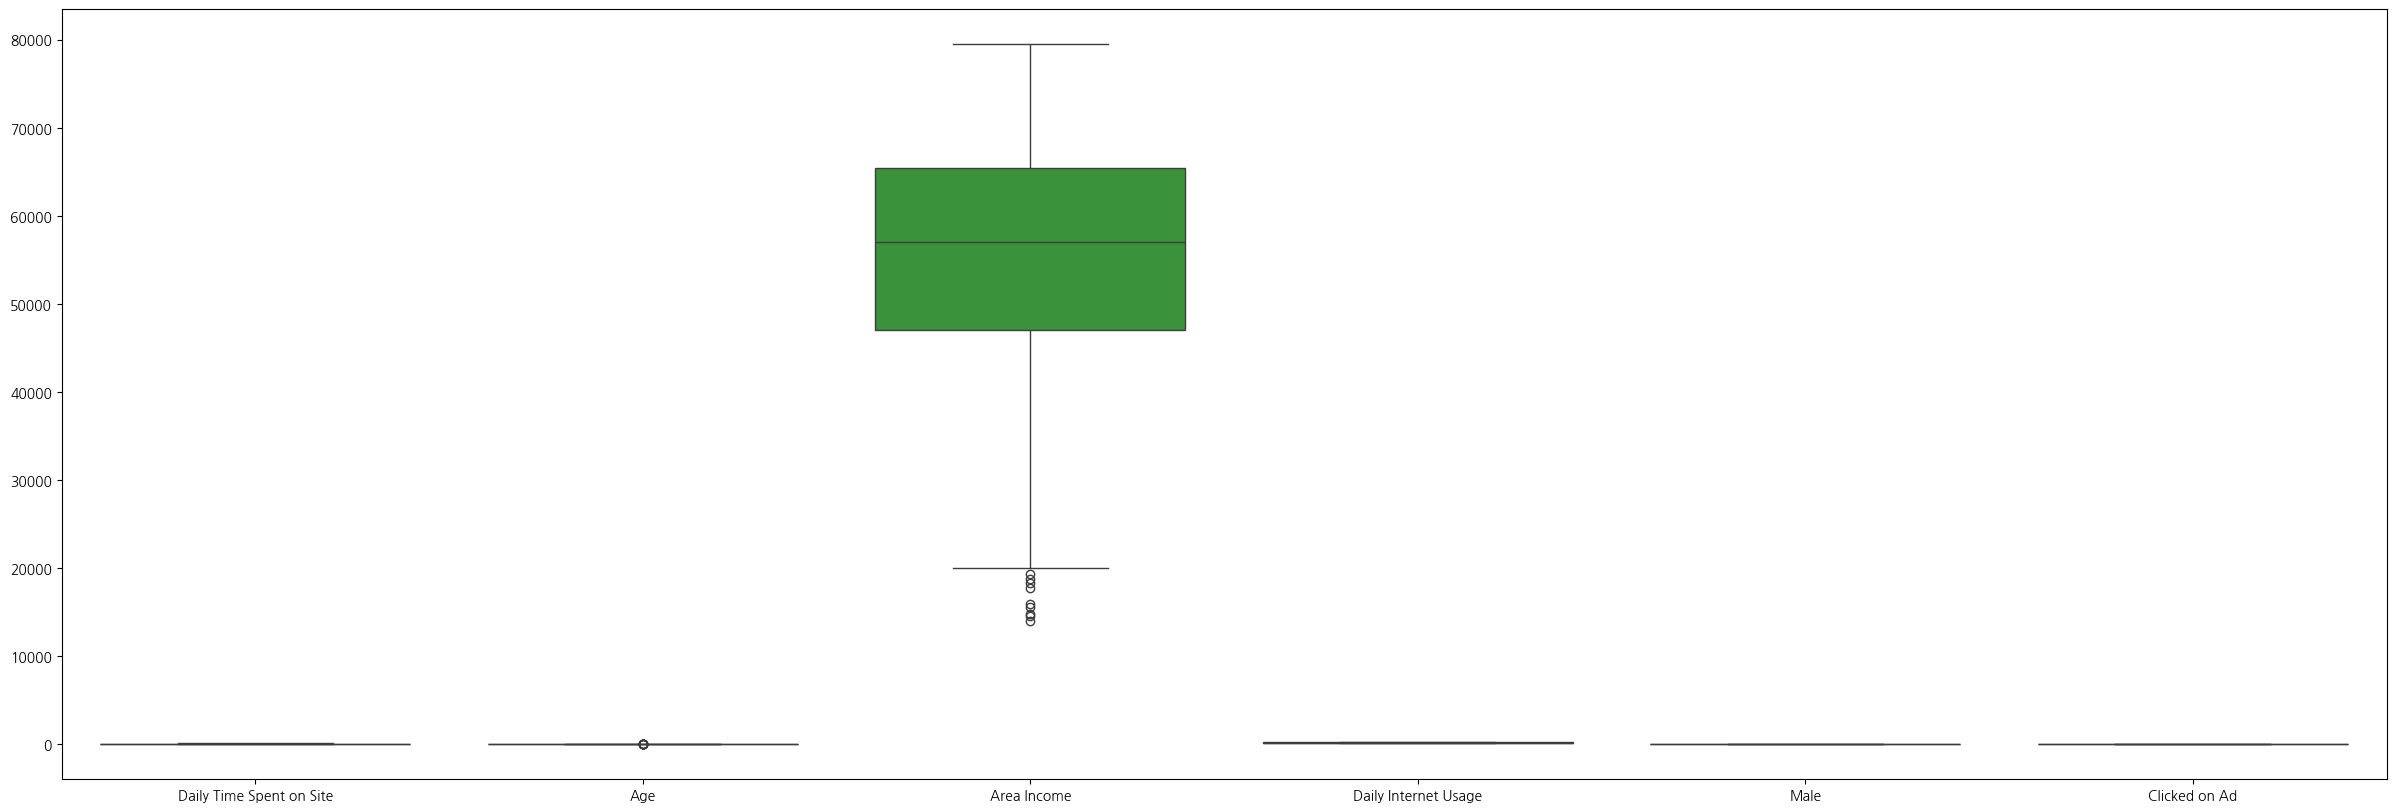

In [49]:
plt.figure(figsize=(30,10))
sns.boxplot(num_cols)

In [50]:
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2/11/2016 21:49,1
996,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,4/22/2016 2:07,1
997,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2/1/2016 17:24,1
998,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,3/24/2016 2:35,0


In [51]:
data = data.drop(['Ad Topic Line','City','Timestamp'], axis=1)

In [52]:
data = pd.get_dummies(data, drop_first=True)

In [53]:
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Country_Albania,Country_Algeria,Country_American Samoa,Country_Andorra,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,68.95,35.0,61833.90,256.09,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,80.23,31.0,68441.85,193.77,1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,69.47,26.0,59785.94,236.50,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,74.15,29.0,54806.18,245.89,1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,68.37,35.0,73889.99,225.58,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30.0,71384.57,208.58,1,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,51.30,45.0,67782.17,134.42,1,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,51.63,51.0,42415.72,120.37,1,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,55.55,19.0,41920.79,187.95,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X = data.drop('Clicked on Ad', axis=1)
y = data['Clicked on Ad']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3 , random_state= 10)

In [135]:
X_train

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country_Albania,Country_Algeria,Country_American Samoa,Country_Andorra,Country_Angola,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
742,71.90,29.0,72203.96,193.29,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
676,39.36,29.0,52462.04,161.79,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
571,72.76,33.0,66431.87,240.63,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99,79.71,34.0,69456.83,211.65,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
78,56.14,38.0,32689.04,113.53,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,51.50,34.0,67050.16,135.31,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
527,59.61,21.0,60637.62,198.45,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,51.30,45.0,67782.17,134.42,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
125,79.57,35.0,61227.59,230.93,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [63]:
y_train

742    0
676    1
571    0
99     0
78     1
      ..
320    1
527    0
996    1
125    0
265    1
Name: Clicked on Ad, Length: 700, dtype: int64

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
ss = StandardScaler()
ss.fit(X_train)
ss.fit(X_test)
ss_X_train = ss.transform(X_train)
ss_X_test = ss.transform(X_test)
ss_X_train = pd.DataFrame(X_train, columns=X_train.columns, index=X_train.index)
ss_X_test = pd.DataFrame(X_test, columns= X_test.columns, index=X_test.index)

In [66]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [67]:
ss_X_train_const =  sm.add_constant(ss_X_train)
ss_X_train_const =  sm.add_constant(ss_X_test)

In [68]:
ss_X_train_const.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 841 to 260
Columns: 242 entries, const to Country_Zimbabwe
dtypes: bool(236), float64(5), int64(1)
memory usage: 85.5 KB


In [69]:
y_train

742    0
676    1
571    0
99     0
78     1
      ..
320    1
527    0
996    1
125    0
265    1
Name: Clicked on Ad, Length: 700, dtype: int64

In [70]:
ss_X_train_const = ss_X_train_const.astype(float)
ss_X_test_const = ss_X_test_const.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

NameError: name 'ss_X_test_const' is not defined

In [71]:
ols = sm.OLS(y_train, ss_X_train_const).fit()
pred = ols.predict(ss_X_test_const)
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
print("R2: ", r2_score(y_test, pred))

ValueError: The indices for endog and exog are not aligned

# 나이브베이즈를 이용해서 분류분석하기
* 독립변수가 수치형으로 이루어진경우 : GaussianNB
* 문자가 많은 경우: MultinominalNB
* https://konlpy.org/ko/latest/index.html

In [57]:
X = data.drop("Clicked on Ad", axis=1)
y = data["Clicked on Ad"]

In [58]:
y.value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
	
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [61]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [62]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       146
           1       0.95      0.97      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

